In [ ]:
from os import path
import gdown
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import heapq
from collections import defaultdict

# Parte 1

Estadísticas para ingenieros que miran el cielo

Dadas las señales de temperaturas diarias registradas durante cierto periodo en las tres ciudades (S1: Quito, S2: Melbourne, S3: Oslo), expresadas como valores enteros, en °C (grados centígrados):

In [ ]:
if not path.exists("temperature_Quito_celsius.csv"):
    file_id1 = '1UavCUcs6I59xc05unC9xamawLbcdX-Gu'
    url1 = f'https://drive.google.com/uc?id={file_id1}'
    gdown.download(url1, 'temperature_Quito_celsius.csv', quiet=False)

if not path.exists("temperature_Melbourne_celsius.csv"):
    file_id2 = '1ZRSdO3tHb_oA4TCieaunokS3srcqv2bq'
    url2 = f'https://drive.google.com/uc?id={file_id2}'
    gdown.download(url2, 'temperature_Melbourne_celsius.csv', quiet=False)

if not path.exists("temperature_Oslo_celsius.csv"):
    file_id3 = '1bNzPd0GEjmzpks7uWyGO6sZzkWkc15jk'
    url3 = f'https://drive.google.com/uc?id={file_id3}'
    gdown.download(url3, 'temperature_Oslo_celsius.csv', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1UavCUcs6I59xc05unC9xamawLbcdX-Gu
To: /content/temperature_Quito_celsius.csv
100%|██████████| 35.1k/35.1k [00:00<00:00, 18.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ZRSdO3tHb_oA4TCieaunokS3srcqv2bq
To: /content/temperature_Melbourne_celsius.csv
100%|██████████| 35.1k/35.1k [00:00<00:00, 50.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1bNzPd0GEjmzpks7uWyGO6sZzkWkc15jk
To: /content/temperature_Oslo_celsius.csv
100%|██████████| 33.3k/33.3k [00:00<00:00, 48.2MB/s]


In [ ]:
dataset_quito = pd.read_csv('temperature_Quito_celsius.csv')
dataset_melbourne = pd.read_csv('temperature_Melbourne_celsius.csv')
dataset_oslo = pd.read_csv('temperature_Oslo_celsius.csv')

serie_quito = pd.read_csv('temperature_Quito_celsius.csv')['AvgTemperature']
serie_melbourne = pd.read_csv('temperature_Melbourne_celsius.csv')['AvgTemperature']
serie_oslo = pd.read_csv('temperature_Oslo_celsius.csv')['AvgTemperature']

In [ ]:
conteo_quito_ordenado = serie_quito.value_counts().sort_index(ascending=False)
print('Valores de temperatura de Quito')
print(conteo_quito_ordenado)

Valores de temperatura de Quito
AvgTemperature
19.0       4
18.0      13
17.0      66
16.0     299
15.0    1024
14.0    1636
13.0    1691
12.0     854
11.0     220
10.0      35
9.0        2
Name: count, dtype: int64


In [ ]:
conteo_melbourne_ordenado = serie_melbourne.value_counts().sort_index(ascending=False)
print('Valores de temperatura de Melbourne')
print(conteo_melbourne_ordenado)

Valores de temperatura de Melbourne
AvgTemperature
 31.0      2
 30.0      4
 29.0      8
 28.0     12
 27.0     29
 26.0     80
 25.0    147
 24.0    247
 23.0    352
 22.0    407
 21.0    467
 20.0    464
 19.0    468
 18.0    396
 17.0    395
 16.0    416
 15.0    385
 14.0    419
 13.0    399
 12.0    343
 11.0    204
 10.0    139
 9.0      36
 8.0       7
 7.0       1
-73.0     17
Name: count, dtype: int64


In [ ]:
conteo_oslo_ordenado = serie_oslo.value_counts().sort_index(ascending=False)
print('Valores de temperatura de Oslo')
print(conteo_oslo_ordenado)

Valores de temperatura de Oslo
AvgTemperature
 24.0      1
 23.0      9
 22.0     14
 21.0     38
 20.0     47
 19.0     87
 18.0    114
 17.0    140
 16.0    180
 15.0    242
 14.0    258
 13.0    248
 12.0    239
 11.0    219
 10.0    224
 9.0     193
 8.0     177
 7.0     182
 6.0     156
 5.0     204
 4.0     235
 3.0     193
 2.0     239
 1.0     262
 0.0     283
-1.0     246
-2.0     188
-3.0     193
-4.0     157
-5.0     140
-6.0     110
-7.0      99
-8.0      85
-9.0      74
-10.0     58
-11.0     48
-12.0     51
-13.0     52
-14.0     35
-15.0     28
-16.0     22
-17.0     18
-18.0     20
-19.0      8
-20.0      5
-21.0      5
-22.0      4
-23.0      2
-73.0     12
Name: count, dtype: int64


In [ ]:
media_melbourne = serie_melbourne[serie_melbourne >= -25].mean()
media_oslo = serie_oslo[serie_oslo >= -25].mean()
serie_melbourne = serie_melbourne.apply(lambda x: media_melbourne if x < -25 else x)
serie_oslo = serie_oslo.apply(lambda x: media_oslo if x < -25 else x)

## inciso 1
Calcular la temperatura promedio y la desviación estándar para cada señal Si y analizar cómo se comportan estadísticamente.

In [ ]:
print(f'Temperatura promedio Quito: {serie_quito.mean():.4f}')
print(f'Desviación estándar Quito: {serie_quito.std():.4f}')
print(f'Temperatura promedio Melbourne: {media_melbourne:.4f}')
print(f'Desviación estándar Melbourne: {serie_melbourne.std():.4f}')
print(f'Temperatura promedio Oslo: {media_oslo}')
print(f'Desviación estándar Oslo: {serie_oslo.std():.4f}')

Temperatura promedio Quito: 13.6035
Desviación estándar Quito: 1.3017
Temperatura promedio Melbourne: 17.7980
Desviación estándar Melbourne: 4.2477
Temperatura promedio Oslo: 4.770919067215363
Desviación estándar Oslo: 8.7822


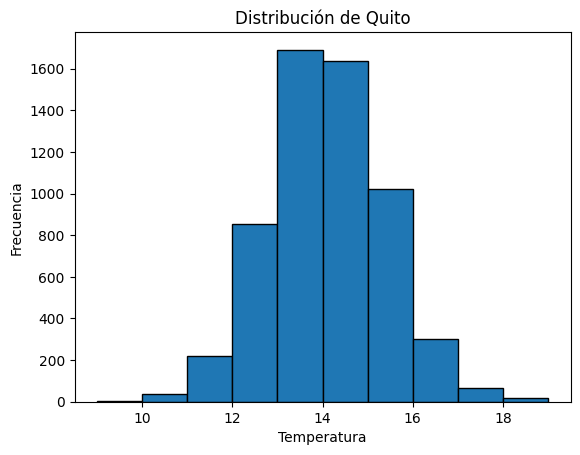

In [ ]:
import matplotlib.pyplot as plt
plt.hist(serie_quito, bins=10, edgecolor='black', rwidth=1)
plt.title('Distribución de Quito')
plt.xlabel('Temperatura')
plt.ylabel('Frecuencia')
plt.show()

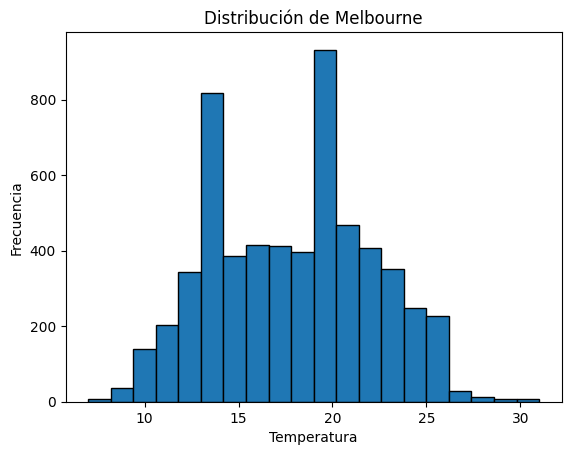

In [ ]:
plt.hist(serie_melbourne, bins=20, edgecolor='black', rwidth=1)
plt.title('Distribución de Melbourne')
plt.xlabel('Temperatura')
plt.ylabel('Frecuencia')
plt.show()

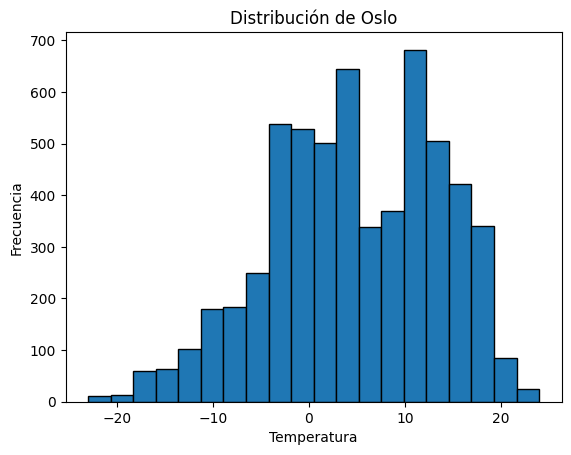

In [ ]:
plt.hist(serie_oslo, bins=20, edgecolor='black', rwidth=1)
plt.title('Distribución de Oslo')
plt.xlabel('Temperatura')
plt.ylabel('Frecuencia')
plt.show()

## inciso 2
Calcular el factor de correlación cruzada entre cada par de señales. Discutir si existen correlaciones significativas o no (tratando de establecer, por ejemplo, si Melbourne podría estar prediciendo el clima de Quito, o de Oslo.. o si no tienen nada que ver).

In [ ]:
correlacion_quito_melbourne = serie_quito.corr(serie_melbourne)
corr_quito_oslo =  serie_quito.corr(serie_oslo)
corr_melbourne_oslo =  serie_melbourne.corr(serie_oslo)

print(f"Correlación entre quito y melbourne: {correlacion_quito_melbourne:.4f}")
print(f"Correlación entre quito y oslo: {corr_quito_oslo:.4f}")
print(f"Correlación entre melbourne y oslo: {corr_melbourne_oslo:.4f}")

Correlación entre quito y melbourne: -0.0258
Correlación entre quito y oslo: 0.0827
Correlación entre melbourne y oslo: -0.7284


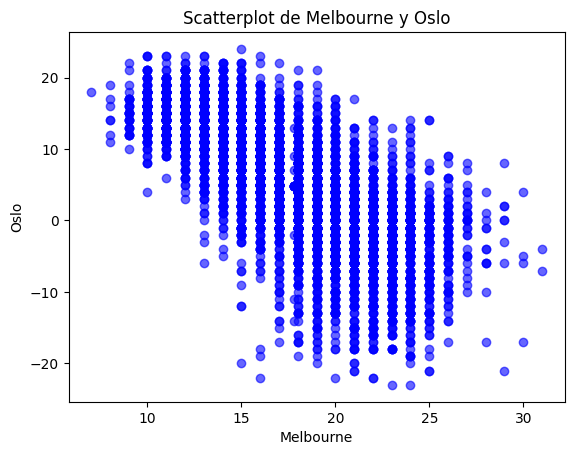

In [ ]:
plt.scatter(serie_melbourne, serie_oslo, color='blue', alpha=0.6)
plt.title('Scatterplot de Melbourne y Oslo')
plt.xlabel('Melbourne')
plt.ylabel('Oslo')
plt.show()

# Parte 2

Una fuente de calor… markoviana

Considerando los valores de temperatura t que componen cada señal Si, construir una nueva señal Ti  compuesta por una secuencia de símbolos discretos F, T o C, definidos según:

F (frío): si t < 11°C

T (templado): si 11 ≤ t < 19°C

C (cálido): si t ≥ 19°C

Para cada Ti:


## inciso 1
Modelar la fuente con memoria de orden 1 (Markov), obtener la matriz de transición y analizar su comportamiento (por ejemplo, tratá de descubrir cosas como: En Oslo, si hace frío hoy, es casi seguro que siga así hasta julio..)

In [ ]:
def asignar_estado(valor):
    if valor<11:
        return 0
    elif valor <19:
        return 1
    else:
        return 2

def calcular_probabilidades_transicion(serie_estados, num_estados):
    conteo = np.zeros((num_estados, num_estados), dtype=int)

    for actual, siguiente in zip(serie_estados[:-1], serie_estados[1:]):
        conteo[siguiente, actual] += 1

    with np.errstate(divide='ignore', invalid='ignore'):
        probabilidades = conteo / conteo.sum(axis=0, keepdims=True)
        probabilidades = np.nan_to_num(probabilidades, nan=0.0)

    return probabilidades

serie_quito_estados=serie_quito.apply(asignar_estado)
matriz_transicion_quito = calcular_probabilidades_transicion(serie_quito_estados, 3)

etiquetas = ['F', 'T', 'C']
df_matriz_transicion_quito = pd.DataFrame(matriz_transicion_quito, index=etiquetas, columns=etiquetas)
print("Matriz de transición con probabilidades de Quito:")
print(df_matriz_transicion_quito.round(4))

Matriz de transición con probabilidades de Quito:
        F       T    C
F  0.0541  0.0060  0.0
T  0.9459  0.9933  1.0
C  0.0000  0.0007  0.0


In [ ]:
serie_melbourne_estados=serie_melbourne.apply(asignar_estado)
matriz_transicion_melbourne = calcular_probabilidades_transicion(serie_melbourne_estados, 3)

df_matriz_transicion_melbourne = pd.DataFrame(matriz_transicion_melbourne, index=etiquetas, columns=etiquetas)
print("Matriz de transición con probabilidades de Melbourne:")
print(df_matriz_transicion_melbourne.round(4))

Matriz de transición con probabilidades de Melbourne:
        F       T       C
F  0.4863  0.0316  0.0000
T  0.5137  0.8359  0.1467
C  0.0000  0.1325  0.8533


In [ ]:
serie_oslo_estados=serie_oslo.apply(asignar_estado)
matriz_transicion_oslo = calcular_probabilidades_transicion(serie_oslo_estados, 3)

df_matriz_transicion_oslo = pd.DataFrame(matriz_transicion_oslo, index=etiquetas, columns=etiquetas)
print("Matriz de transición con probabilidades de Oslo:")
print(df_matriz_transicion_oslo.round(4))

Matriz de transición con probabilidades de Oslo:
        F       T       C
F  0.9593  0.0994  0.0000
T  0.0407  0.8652  0.2959
C  0.0000  0.0354  0.7041


## inciso 2.1
Usar muestreo Monte Carlo para obtener, para cada símbolo:

La probabilidad estacionaria (esa a la que llegás después de mucho simular).

convergencia para vector estacionario Quito


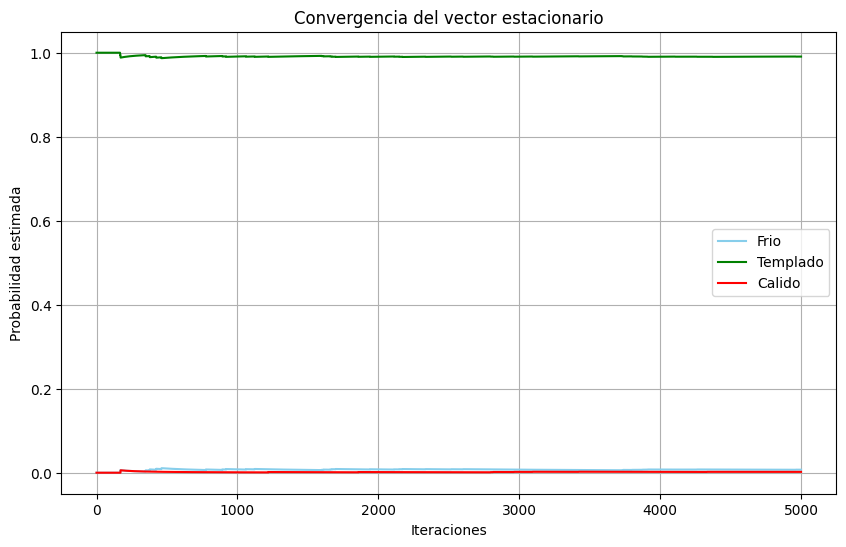

vector estacionario Quito: [0.0072 0.9908 0.002 ]
convergencia para vector estacionario Melbourne


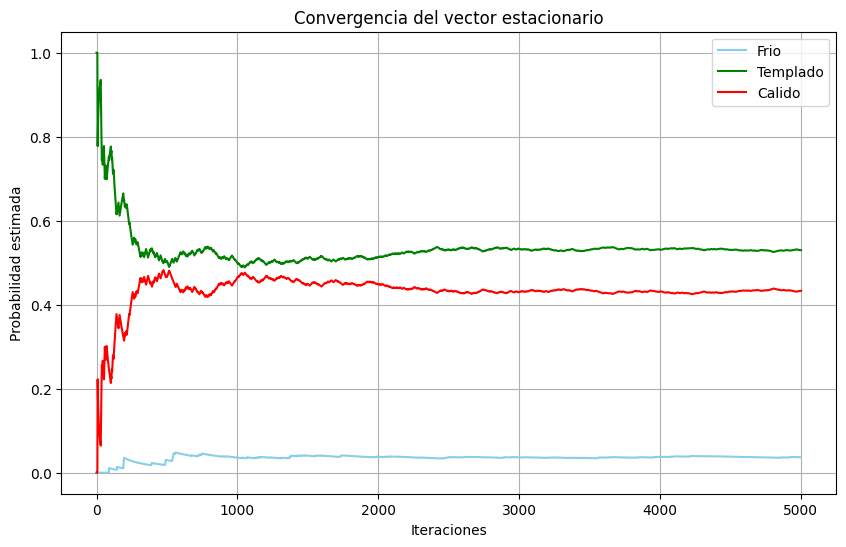

vector estacionario Melbourne: [0.03697042 0.52977618 0.4332534 ]
convergencia para vector estacionario Oslo


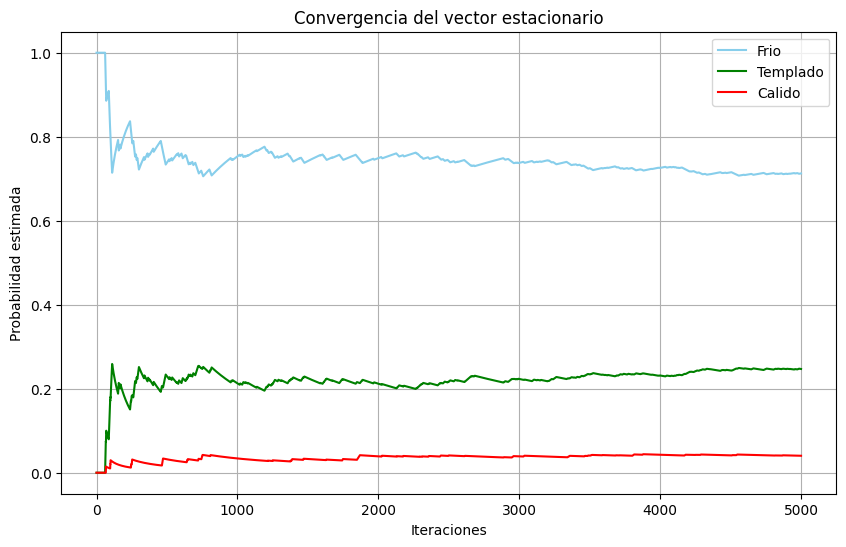

vector estacionario Oslo: [0.7126 0.247  0.0404]


In [ ]:
def sig_dado_ant(matriz_acumulada,s_ant):
    r = np.random.rand()
    for i in range(3):
        if r < matriz_acumulada[i,s_ant]:
            return i

def converge_arr(vt, vt_ant,e):
    for i in range(len(vt)):
        if abs(vt[i]-vt_ant[i])>e:
            return False
    return True

def calcular_vector_estacionario(matriz_acumulada, e=0.0001, min_iteraciones=5000):
    emisiones = np.array([0, 0, 0])
    vt = np.array([0, 0, 0])
    vt_ant = np.array([0, 0, 0])
    mensajes = 0
    s_actual = 0
    historial = []
    while not converge_arr(vt, vt_ant,e) or (mensajes < min_iteraciones):
        s_actual = sig_dado_ant(matriz_acumulada,s_actual)
        emisiones[s_actual] += 1
        mensajes += 1
        vt_ant = vt.copy()
        vt = emisiones/mensajes
        historial.append(vt.copy())
    historial = np.array(historial)
    plt.figure(figsize=(10, 6))
    plt.plot(historial[:, 0], label='Frio', color='skyblue')
    plt.plot(historial[:, 1], label='Templado', color='green')
    plt.plot(historial[:, 2], label='Calido', color='red')
    plt.title('Convergencia del vector estacionario')
    plt.xlabel('Iteraciones')
    plt.ylabel('Probabilidad estimada')
    plt.legend()
    plt.grid(True)
    plt.show()
    return vt


matriz_acum_quito = np.cumsum(matriz_transicion_quito, axis=0)
matriz_acum_melbourne = np.cumsum(matriz_transicion_melbourne, axis=0)
matriz_acum_oslo = np.cumsum(matriz_transicion_oslo, axis=0)

print('convergencia para vector estacionario Quito')
vector_estacionario_quito = calcular_vector_estacionario(matriz_acum_quito)
print(f"vector estacionario Quito: {vector_estacionario_quito}")
print('convergencia para vector estacionario Melbourne')
vector_estacionario_melbourne = calcular_vector_estacionario(matriz_acum_melbourne)
print(f"vector estacionario Melbourne: {vector_estacionario_melbourne}")
print('convergencia para vector estacionario Oslo')
vector_estacionario_oslo = calcular_vector_estacionario(matriz_acum_oslo)
print(f"vector estacionario Oslo: {vector_estacionario_oslo}")

## inciso 2.2
El tiempo medio de 1° recurrencia (ese que te dice, en promedio, cuánto tarda un símbolo en volver a aparecer después de haberse emitido).

In [ ]:
def converge(media, media_ant, e):
    if abs(media - media_ant)>e:
        return False
    return True

def media_primera_recurrencia(matriz_acumulada,simbolo,e=0.0001, min_iteraciones=5000):
    retornos= 0
    media=0
    media_ant=0
    t_actual=0
    s_actual=simbolo
    while  not converge(media, media_ant,e) or (t_actual< min_iteraciones):
        s_actual=sig_dado_ant(matriz_acumulada,s_actual)
        t_actual+=1
        if s_actual==simbolo:
            retornos+=1
            media_ant=media
            media=t_actual/retornos
    return media

print('media primera recurrencia en Quito para Frio')
print(f"{media_primera_recurrencia(matriz_acum_quito,0):.4f}")
print('media primera recurrencia en Quito para Templado')
print(f"{media_primera_recurrencia(matriz_acum_quito,1):.4f}")
print('media primera recurrencia en Quito para Calor')
print(f"{media_primera_recurrencia(matriz_acum_quito,2):.4f}")
print('media primera recurrencia en Melbourne para Frio')
print(f"{media_primera_recurrencia(matriz_acum_melbourne,0):.4f}")
print('media primera recurrencia en Melbourne para Templado')
print(f"{media_primera_recurrencia(matriz_acum_melbourne,1):.4f}")
print('media primera recurrencia en Melbourne para Calor')
print(f"{media_primera_recurrencia(matriz_acum_melbourne,2):.4f}")
print('media primera recurrencia en Oslo para Frio')
print(f"{media_primera_recurrencia(matriz_acum_oslo,0):.4f}")
print('media primera recurrencia en Oslo para Templado')
print(f"{media_primera_recurrencia(matriz_acum_oslo,1):.4f}")
print('media primera recurrencia en Oslo para Calor')
print(f"{media_primera_recurrencia(matriz_acum_oslo,2):.4f}")


media primera recurrencia en Quito para Frio
160.0189
media primera recurrencia en Quito para Templado
1.0068
media primera recurrencia en Quito para Calor
1457.4439
media primera recurrencia en Melbourne para Frio
33.8886
media primera recurrencia en Melbourne para Templado
1.9726
media primera recurrencia en Melbourne para Calor
2.0908
media primera recurrencia en Oslo para Frio
1.5982
media primera recurrencia en Oslo para Templado
3.5362
media primera recurrencia en Oslo para Calor
30.1074


# Parte 3

## inciso 1
Entropía, Huffman y la batalla por los bits

Calcular la entropía de cada fuente Ti :

Sin memoria (orden 0), considerando símbolos individuales.

Con memoria (orden 1), usando información sobre transiciones entre símbolos.

Interpretar los resultados: ¿Qué ciudad presenta menor entropía? ¿Cuál más? ¿Esto hace que alguna ciudad sea más impredecible que otra? (Spoiler: tal vez no sea la que imaginas).


In [ ]:
def entropia_sin_memoria(vector_estacionario):
    resultado = 0
    for i in range(len(vector_estacionario)):
        if vector_estacionario[i] > 0:
            resultado += vector_estacionario[i] * math.log(vector_estacionario[i], 2)
    return -resultado

def calcular_hi(matriz_transicion):
    filas = len(matriz_transicion)
    columnas = len(matriz_transicion[0])
    resultado = [0] * columnas
    for j in range(columnas):
        for i in range(filas):
            if matriz_transicion[i][j] > 0:
                resultado[j] += matriz_transicion[i][j] * math.log(matriz_transicion[i][j], 2)
        resultado[j] = -resultado[j]
    return resultado

def entropia_con_memoria(vector_estacionario, hi):
    resultado = 0
    for i in range(len(vector_estacionario)):
        resultado += vector_estacionario[i] * hi[i]
    return resultado

entropia_sin_memoria_quito = entropia_sin_memoria(vector_estacionario_quito)
entropia_sin_memoria_melbourne = entropia_sin_memoria(vector_estacionario_melbourne)
entropia_sin_memoria_oslo = entropia_sin_memoria(vector_estacionario_oslo)

hi_quito = calcular_hi(matriz_transicion_quito)
hi_melbourne = calcular_hi(matriz_transicion_melbourne)
hi_oslo = calcular_hi(matriz_transicion_oslo)

entropia_con_memoria_quito = entropia_con_memoria(vector_estacionario_quito, hi_quito)
entropia_con_memoria_melbourne = entropia_con_memoria(vector_estacionario_melbourne, hi_melbourne)
entropia_con_memoria_oslo = entropia_con_memoria(vector_estacionario_oslo, hi_oslo)

print('Entropia sin memoria Quito')
print(f"{entropia_sin_memoria_quito:.4f}")
print('Entropia con memoria Quito')
print(f"{entropia_con_memoria_quito:.4f}")
print('Entropia sin memoria Melbourne')
print(f"{entropia_sin_memoria_melbourne:.4f}")
print('Entropia con memoria Melbourne')
print(f"{entropia_con_memoria_quito:.4f}")
print('Entropia sin memoria Oslo')
print(f"{entropia_sin_memoria_oslo:.4f}")
print('Entropia con memoria Oslo')
print(f"{entropia_con_memoria_oslo:.4f}")

Entropia sin memoria Quito
0.0824
Entropia con memoria Quito
0.0630
Entropia sin memoria Melbourne
1.1843
Entropia con memoria Melbourne
0.0630
Entropia sin memoria Oslo
1.0337
Entropia con memoria Oslo
0.3788


## inciso 2
Implementar el algoritmo de Huffman para codificar cada señal Ti  y su extensión a orden 2, teniendo en cuenta que la fuente es markoviana. Aplicar el Teorema de Shannon y analizar resultados (Shannon se revuelca en su tumba? o aplaude desde el más allá?)

In [ ]:
def matriz_a_diccionario(matriz, claves):
    diccionario = {}
    for i, fila in enumerate(matriz):
        diccionario[claves[i]] = {}
        for j, valor in enumerate(fila):
            diccionario[claves[i]][claves[j]] = valor
    return diccionario

def array_a_diccionario(array, claves):
    return {claves[i]: array[i] for i in range(len(claves))}

claves = ['F', 'T', 'C']

vector_estacionario_diccionario_quito = array_a_diccionario(vector_estacionario_quito,claves)
vector_estacionario_diccionario_melbourne = array_a_diccionario(vector_estacionario_melbourne,claves)
vector_estacionario_diccionario_oslo = array_a_diccionario(vector_estacionario_oslo,claves)

matriz_diccionario_quito = matriz_a_diccionario(matriz_transicion_quito,claves)
matriz_diccionario_melbourne = matriz_a_diccionario(matriz_transicion_melbourne,claves)
matriz_diccionario_oslo = matriz_a_diccionario(matriz_transicion_oslo,claves)

In [ ]:
class NodoHuffman:
    def __init__(self, simbolo, probabilidad, izq=None, der=None):
        self.simbolo = simbolo
        self.probabilidad = probabilidad
        self.izq = izq
        self.der = der

    def __lt__(self, otro):
        return self.probabilidad < otro.probabilidad

def generar_codigos_huffman(probabilidades):
    heap = []

    for simbolo, prob in probabilidades.items():
        heapq.heappush(heap, NodoHuffman(simbolo, prob))

    while len(heap) > 1:
        nodo1 = heapq.heappop(heap)
        nodo2 = heapq.heappop(heap)
        nodo_interno = NodoHuffman(None, nodo1.probabilidad + nodo2.probabilidad, nodo1, nodo2)
        heapq.heappush(heap, nodo_interno)

    def recorrer_arbol(nodo, codigo_actual, codigos):
        if nodo is None:
            return
        if nodo.simbolo is not None:
            codigos[nodo.simbolo] = codigo_actual
        recorrer_arbol(nodo.izq, codigo_actual + '0', codigos)
        recorrer_arbol(nodo.der, codigo_actual + '1', codigos)

    raiz = heap[0]
    codigos = {}
    recorrer_arbol(raiz, "", codigos)
    return codigos

codigos_quito = generar_codigos_huffman(vector_estacionario_diccionario_quito)
print("Códigos Huffman Quito:")
for simbolo in vector_estacionario_diccionario_quito.keys():
    print(f"{simbolo}: {codigos_quito[simbolo]}")

codigos_melbourne = generar_codigos_huffman(vector_estacionario_diccionario_melbourne)
print("Códigos Huffman Melbourne:")
for simbolo in vector_estacionario_diccionario_melbourne.keys():
    print(f"{simbolo}: {codigos_melbourne[simbolo]}")

codigos_oslo = generar_codigos_huffman(vector_estacionario_diccionario_oslo)
print("Códigos Huffman Oslo:")
for simbolo in vector_estacionario_diccionario_oslo.keys():
    print(f"{simbolo}: {codigos_oslo[simbolo]}")

Códigos Huffman Quito:
F: 01
T: 1
C: 00
Códigos Huffman Melbourne:
F: 00
T: 1
C: 01
Códigos Huffman Oslo:
F: 1
T: 01
C: 00


Huffman orden 2

In [ ]:
def extenderOrdenDos(probabilidades, matrix):
    probOrdenDos = {}
    for s1 in probabilidades:
        for s2 in matrix[s1]:
            combinacion = s1+s2
            prob = probabilidades[s1]*matrix[s2][s1]
            probOrdenDos[combinacion] = prob
    return probOrdenDos

prob_quito_orden_dos = extenderOrdenDos(vector_estacionario_diccionario_quito,matriz_diccionario_quito)
codigos_quito_orden_dos = generar_codigos_huffman(prob_quito_orden_dos)

print("Códigos Huffman Quito orden 2:")
for simbolo in codigos_quito_orden_dos.keys():
    print(f"{simbolo}: {codigos_quito_orden_dos[simbolo]}")

Códigos Huffman Quito orden 2:
FT: 00
CC: 0100000
FC: 01000010
CF: 01000011
FF: 010001
TC: 01001
CT: 0101
TF: 011
TT: 1


In [ ]:
prob_melbourne_orden_dos = extenderOrdenDos(vector_estacionario_diccionario_melbourne,matriz_diccionario_melbourne)
codigos_melbourne_orden_dos = generar_codigos_huffman(prob_melbourne_orden_dos)

print("Códigos Huffman Melbourne orden 2:")
for simbolo in codigos_melbourne_orden_dos.keys():
    print(f"{simbolo}: {codigos_melbourne_orden_dos[simbolo]}")

Códigos Huffman Melbourne orden 2:
TT: 0
TC: 100
FT: 10100
FC: 10101000
CF: 10101001
TF: 1010101
FF: 101011
CT: 1011
CC: 11


In [ ]:
prob_oslo_orden_dos = extenderOrdenDos(vector_estacionario_diccionario_oslo,matriz_diccionario_oslo)
codigos_oslo_orden_dos = generar_codigos_huffman(prob_oslo_orden_dos)

print("Códigos Huffman Oslo orden 2:")
for simbolo in codigos_oslo_orden_dos.keys():
    print(f"{simbolo}: {codigos_oslo_orden_dos[simbolo]}")

Códigos Huffman Oslo orden 2:
FC: 0000000
CF: 0000001
TC: 000001
CT: 00001
TF: 0001
CC: 0010
FT: 0011
TT: 01
FF: 1


In [ ]:
def calcular_longitud_media(probabilidades, codigos):
    res = 0
    for simbolo in codigos:
        res += len(codigos[simbolo]) * probabilidades[simbolo]
    return res

long_media_quito = calcular_longitud_media(vector_estacionario_diccionario_quito, codigos_quito)
long_media_quito_orden_dos = calcular_longitud_media(prob_quito_orden_dos, codigos_quito_orden_dos)

long_media_melbourne = calcular_longitud_media(vector_estacionario_diccionario_melbourne, codigos_melbourne)
long_media_melbourne_orden_dos = calcular_longitud_media(prob_melbourne_orden_dos, codigos_melbourne_orden_dos)

long_media_oslo = calcular_longitud_media(vector_estacionario_diccionario_oslo, codigos_oslo)
long_media_oslo_orden_dos = calcular_longitud_media(prob_oslo_orden_dos, codigos_oslo_orden_dos)


In [ ]:
def verificar_shannon_sin_memoria(entropia, longitud_media):
    print(f"Entropía H = {entropia:.4f}")
    print(f"Longitud media L = {longitud_media:.4f}")
    print(f"Desigualdad esperada: {entropia:.4f} ≤ {longitud_media:.4f} < {entropia + 1:.4f}")

    if entropia <= longitud_media < entropia + 1:
        print("Cumple con la desigualdad de Shannon.")
    else:
        print("No cumple con la desigualdad de Shannon.")

print('verificacion de Shannon para Quito sin memoria')
verificar_shannon_sin_memoria(entropia_sin_memoria_quito, long_media_quito)
print("---------------------------------------------------------------------")
print('verificacion de Shannon para Melbourne sin memoria')
verificar_shannon_sin_memoria(entropia_sin_memoria_melbourne, long_media_melbourne)
print("---------------------------------------------------------------------")
print('verificacion de Shannon para Oslo sin memoria')
verificar_shannon_sin_memoria(entropia_sin_memoria_oslo, long_media_oslo)

verificacion de Shannon para Quito sin memoria
Entropía H = 0.0824
Longitud media L = 1.0092
Desigualdad esperada: 0.0824 ≤ 1.0092 < 1.0824
Cumple con la desigualdad de Shannon.
---------------------------------------------------------------------
verificacion de Shannon para Melbourne sin memoria
Entropía H = 1.1843
Longitud media L = 1.4702
Desigualdad esperada: 1.1843 ≤ 1.4702 < 2.1843
Cumple con la desigualdad de Shannon.
---------------------------------------------------------------------
verificacion de Shannon para Oslo sin memoria
Entropía H = 1.0337
Longitud media L = 1.2874
Desigualdad esperada: 1.0337 ≤ 1.2874 < 2.0337
Cumple con la desigualdad de Shannon.


In [ ]:
def verificar_shannon_con_memoria(entropia, entropia_condicional,longitud_media, n):
    Hn = entropia + (n - 1) * entropia_condicional
    print(f"Entropía Hn = {Hn:.4f}")
    print(f"Longitud media L = {longitud_media:.4f}")
    print(f"Desigualdad esperada: {Hn:.4f} ≤ {longitud_media:.4f} < {Hn + 1:.4f}")

    if Hn <= longitud_media < Hn + 1:
        print("Cumple con la desigualdad de Shannon.")
    else:
        print("No cumple con la desigualdad de Shannon.")

print('verificacion de Shannon para Quito con memoria')
verificar_shannon_con_memoria(entropia_sin_memoria_quito, entropia_con_memoria_quito, long_media_quito_orden_dos, 2)
print("---------------------------------------------------------------------")
print('verificacion de Shannon para Melbourne con memoria')
verificar_shannon_con_memoria(entropia_sin_memoria_melbourne, entropia_con_memoria_melbourne, long_media_melbourne_orden_dos, 2)
print("---------------------------------------------------------------------")
print('verificacion de Shannon para Oslo sin memoria')
verificar_shannon_con_memoria(entropia_sin_memoria_oslo, entropia_con_memoria_oslo, long_media_oslo_orden_dos, 2)

verificacion de Shannon para Quito con memoria
Entropía Hn = 0.1454
Longitud media L = 1.0294
Desigualdad esperada: 0.1454 ≤ 1.0294 < 1.1454
Cumple con la desigualdad de Shannon.
---------------------------------------------------------------------
verificacion de Shannon para Melbourne con memoria
Entropía Hn = 1.8844
Longitud media L = 1.9671
Desigualdad esperada: 1.8844 ≤ 1.9671 < 2.8844
Cumple con la desigualdad de Shannon.
---------------------------------------------------------------------
verificacion de Shannon para Oslo sin memoria
Entropía Hn = 1.4125
Longitud media L = 1.5512
Desigualdad esperada: 1.4125 ≤ 1.5512 < 2.4125
Cumple con la desigualdad de Shannon.


## inciso 3
En cada caso, calcular la longitud total del mensaje codificado (en bits), compararla con la longitud original del archivo y obtener la tan ansiada tasa de compresión.

### Para orden 0

In [ ]:
def tasa_de_compresion(original, comprimido):
    return original/comprimido


conteo_quito = serie_quito_estados.value_counts()
conteo_oslo = serie_oslo_estados.value_counts()
conteo_melbourne = serie_melbourne_estados.value_counts()

res_quito = 0
res_oslo = 0
res_melbourne = 0
for i, simbolo in zip(range(3),['F','T','C']):
    res_quito += conteo_quito[i]*len(codigos_quito[simbolo])
    res_oslo += conteo_oslo[i]*len(codigos_oslo[simbolo])
    res_melbourne += conteo_melbourne[i]*len(codigos_melbourne[simbolo])

long_codigo_original_quito = len(serie_quito)*8
long_codigo_original_oslo = len(serie_oslo)*8
long_codigo_original_melbourne = len(serie_melbourne)*8

print("datos de quito")
print("---------------------------------------------")
print(f"longitud original: {long_codigo_original_quito}\ncomprimida: {res_quito}")
print(f"la tasa de compresion de los datos de quito es de {tasa_de_compresion(long_codigo_original_quito, res_quito):.4f}:1")
print("---------------------------------------------")
print("datos de melbourne")
print("---------------------------------------------")
print(f"longitud original: {long_codigo_original_melbourne}\ncomprimida: {res_melbourne}")
print(f"la tasa de compresion de los datos de quito es de {tasa_de_compresion(long_codigo_original_melbourne, res_melbourne):.4f}:1")
print("---------------------------------------------")
print("datos de oslo")
print("---------------------------------------------")
print(f"longitud original: {long_codigo_original_oslo}\ncomprimida: {res_oslo}")
print(f"la tasa de compresion de los datos de quito es de {tasa_de_compresion(long_codigo_original_oslo, res_oslo):.4f}:1")
print("---------------------------------------------")


datos de quito
---------------------------------------------
longitud original: 46752
comprimida: 5885
la tasa de compresion de los datos de quito es de 7.9443:1
---------------------------------------------
datos de melbourne
---------------------------------------------
longitud original: 46752
comprimida: 8714
la tasa de compresion de los datos de quito es de 5.3652:1
---------------------------------------------
datos de oslo
---------------------------------------------
longitud original: 46752
comprimida: 7680
la tasa de compresion de los datos de quito es de 6.0875:1
---------------------------------------------


### Para orden 1

In [ ]:
serie_quito_traducida = serie_quito_estados.replace({0: 'F', 1: 'T', 2: 'C'})
serie_melbourne_traducida = serie_melbourne_estados.replace({0: 'F', 1: 'T', 2: 'C'})
serie_oslo_traducida = serie_oslo_estados.replace({0: 'F', 1: 'T', 2: 'C'})

def longitud_codigo_comprimido(serie, codigo):
    res = 0
    for i in range(0,len(serie),2):
        simbolo = serie[i]+serie[i+1]
        res += len(codigo[simbolo])
    return res

res_quito = longitud_codigo_comprimido(serie_quito_traducida, codigos_quito_orden_dos)
res_melbourne = longitud_codigo_comprimido(serie_melbourne_traducida, codigos_melbourne_orden_dos)
res_oslo = longitud_codigo_comprimido(serie_oslo_traducida, codigos_oslo_orden_dos)

print("datos de quito")
print("---------------------------------------------")
print(f"longitud original: {long_codigo_original_quito} comprimida: {res_quito}")
print(f"la tasa de compresion de los datos de quito es de {tasa_de_compresion(long_codigo_original_quito, res_quito):.4f}:1")
print("---------------------------------------------")
print("datos de melbourne")
print("---------------------------------------------")
print(f"longitud original: {long_codigo_original_melbourne} comprimida: {res_melbourne}")
print(f"la tasa de compresion de los datos de quito es de {tasa_de_compresion(long_codigo_original_melbourne, res_melbourne):.4f}:1")
print("---------------------------------------------")
print("datos de oslo")
print("---------------------------------------------")
print(f"longitud original: {long_codigo_original_oslo} comprimida: {res_oslo}")
print(f"la tasa de compresion de los datos de quito es de {tasa_de_compresion(long_codigo_original_oslo, res_oslo):.4f}:1")

datos de quito
---------------------------------------------
longitud original: 46752 comprimida: 2999
la tasa de compresion de los datos de quito es de 15.5892:1
---------------------------------------------
datos de melbourne
---------------------------------------------
longitud original: 46752 comprimida: 5770
la tasa de compresion de los datos de quito es de 8.1026:1
---------------------------------------------
datos de oslo
---------------------------------------------
longitud original: 46752 comprimida: 4624
la tasa de compresion de los datos de quito es de 10.1107:1


# Parte 4

El canal climático de Musk

Ahora el satélite en órbita (SpaceHeat-42) transmite la señal S2 (de Melbourne)… pero lo que llega a la base terrestre es S4 (Melbourne “ruidoso”), misteriosamente diferente.

In [ ]:
from os import path

if not path.exists("temperature_Melbourne_celsius_ruidoso.csv"):
    file_id4 = '1608uqjJspK-AQk17eFdul9vu7QiPfFkV'
    url4 = f'https://drive.google.com/uc?id={file_id4}'
    gdown.download(url4, 'temperature_Melbourne_celsius_ruidoso.csv', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1608uqjJspK-AQk17eFdul9vu7QiPfFkV
To: /content/temperature_Melbourne_celsius_ruidoso.csv
100%|██████████| 23.1k/23.1k [00:00<00:00, 44.4MB/s]


In [ ]:
dataset_melbourne_ruidoso = pd.read_csv('temperature_Melbourne_celsius_ruidoso.csv')
serie_melbourne_ruidoso = dataset_melbourne_ruidoso['AvgTemperature']

In [ ]:
conteo_melbourne_ruidoso_ordenado = serie_melbourne_ruidoso.value_counts().sort_index(ascending=False)
print('Valores de temperatura de Melbourne ruidoso')
print(conteo_melbourne_ruidoso_ordenado)

Valores de temperatura de Melbourne ruidoso
AvgTemperature
 35      2
 32      6
 31      9
 30     29
 29     57
 28     94
 27    112
 26    139
 25    197
 24    260
 23    274
 22    303
 21    331
 20    366
 19    404
 18    449
 17    397
 16    409
 15    398
 14    354
 13    274
 12    233
 11    212
 10    167
 9     125
 8      98
 7      63
 6      45
 5      14
 4       5
 3       1
-68      2
-69      2
-70      3
-72      2
-74      3
-75      1
-76      3
-77      1
Name: count, dtype: int64


In [ ]:
media_melbourne_ruidoso = serie_melbourne_ruidoso[serie_melbourne_ruidoso >= -67].mean()
serie_melbourne_ruidoso = serie_melbourne_ruidoso.apply(lambda x: media_melbourne_ruidoso if x < -67 else x)

## inciso 1
Generar T4 (de igual manera igual que se generaron las otras Ti), y construir la matriz de canal comparando T2 (entrada) y T4 (salida).

In [ ]:
serie_melbourne_ruidoso_estados=serie_melbourne_ruidoso.apply(asignar_estado)
matriz_transicion_melbourne_ruidoso = calcular_probabilidades_transicion(serie_melbourne_ruidoso_estados, 3)

df_matriz_transicion_melbourne_ruidoso = pd.DataFrame(matriz_transicion_melbourne_ruidoso, index=etiquetas, columns=etiquetas)
print("Matriz de transición con probabilidades de Melbourne para el satelite:")
print(df_matriz_transicion_melbourne_ruidoso.round(4))

Matriz de transición con probabilidades de Melbourne para el satelite:
        F       T       C
F  0.3031  0.1199  0.0124
T  0.6313  0.5735  0.3265
C  0.0656  0.3066  0.6611


In [ ]:
def calcular_matriz_de_canal(serie_canal_1, serie_canal_2, num_simbolos):
    matriz = np.zeros((num_simbolos, num_simbolos), dtype=float)

    for s1, s2 in zip(serie_canal_1, serie_canal_2):
        matriz[s2][s1] += 1

    total = matriz.sum()
    if total > 0:
        matriz /= total

    matriz = np.nan_to_num(matriz, nan=0.0)

    return matriz

matriz_canal = calcular_matriz_de_canal(serie_melbourne_estados, serie_melbourne_ruidoso_estados,3)

df_matriz_canal = pd.DataFrame(matriz_canal, index=etiquetas, columns=etiquetas)
print("Matriz P(x,y) del canal:")
print(df_matriz_canal.round(4))

Matriz P(x,y) del canal:
        F       T       C
F  0.0180  0.0707  0.0000
T  0.0133  0.3443  0.1117
C  0.0000  0.0939  0.3480


In [ ]:
matriz_transicion_canal = matriz_canal/vector_estacionario_melbourne

df_matriz_transicion_canal = pd.DataFrame(matriz_transicion_canal, index=etiquetas, columns=etiquetas)
print("Matriz de transición del canal:")
print(df_matriz_transicion_canal.round(4))

Matriz de transición del canal:
       F       T       C
F  0.486  0.1334  0.0000
T  0.361  0.6499  0.2579
C  0.000  0.1773  0.8033


## inciso 2
Calcula el Ruido del canal y la Información mutua. Analizar los valores obtenidos (explicar si es un buen canal o una porquería disfrazada de innovación).

In [ ]:
def calcular_r(matrix):
    matrix = np.array(matrix)
    ruido = {}

    num_filas, num_columnas = matrix.shape

    for i in range(num_columnas):
        r_i = 0
        for j in range(num_filas):
            p = matrix[i][j]
            if p > 0:
                r_i += p * np.log2(p)
        ruido[i] = -r_i

    return ruido

def calcular_ruido(r_x, prob_x):
    ruido_total = 0
    for i in range(len(prob_x)):
        ruido_total += r_x[i] * prob_x[i]
    return ruido_total

r = calcular_r(matriz_transicion_canal)
ruido_canal = calcular_ruido(r,vector_estacionario_melbourne)


py = {}
for i in range(len(matriz_canal)):
  py[i] = 0
  for j in range(len(matriz_canal[i])):
    py[i] += matriz_canal[i][j]

hy = entropia_sin_memoria(py)
info_mutua = hy - ruido_canal

print(f'El ruido del canal es: {ruido_canal:.4f}')
print(f'la informacion mutua del canal es: {info_mutua:.4f}')

El ruido del canal es: 1.0970
la informacion mutua del canal es: 0.2456
